In [1]:
# Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('gpg.csv')

In [3]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [4]:
df.tail()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225
999,Financial Analyst,Male,60,1,PhD,Sales,2,123108,2244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.shape

(1000, 9)

In [7]:
# Check for missing data-values
df.isnull().any()

JobTitle     False
Gender       False
Age          False
PerfEval     False
Education    False
Dept         False
Seniority    False
BasePay      False
Bonus        False
dtype: bool

In [8]:
df.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

In [9]:
df.isna().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [10]:
df.describe(include='all')

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
count,1000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000
unique,10,2,NaN,NaN,4,5,NaN,NaN,NaN
top,Marketing Associate,Male,NaN,NaN,High School,Operations,NaN,NaN,NaN
freq,118,532,NaN,NaN,265,210,NaN,NaN,NaN
mean,NaN,NaN,41.393000,3.037000,NaN,NaN,2.971000,94472.653000,6467.161000
std,NaN,NaN,14.294856,1.423959,NaN,NaN,1.395029,25337.493272,2004.377365
min,NaN,NaN,18.000000,1.000000,NaN,NaN,1.000000,34208.000000,1703.000000
25%,NaN,NaN,29.000000,2.000000,NaN,NaN,2.000000,76850.250000,4849.500000
50%,NaN,NaN,41.000000,3.000000,NaN,NaN,3.000000,93327.500000,6507.000000
75%,NaN,NaN,54.250000,4.000000,NaN,NaN,4.000000,111558.000000,8026.000000


# Preliminary Data Visualization

<AxesSubplot:>

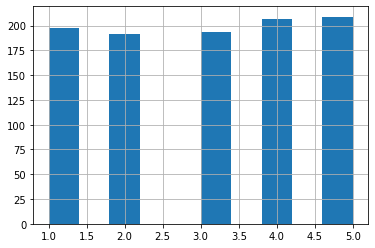

In [11]:
df.PerfEval.hist()

<AxesSubplot:>

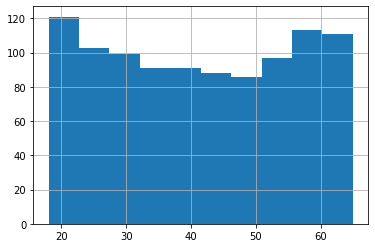

In [12]:
df.Age.hist()

<AxesSubplot:>

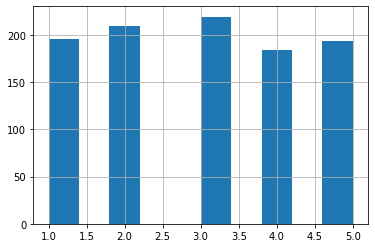

In [13]:
df.Seniority.hist()

<AxesSubplot:>

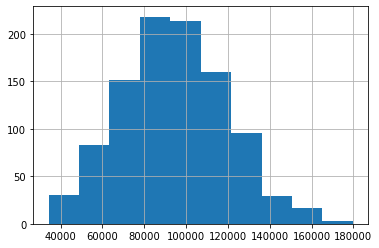

In [14]:
df.BasePay.hist()

<AxesSubplot:>

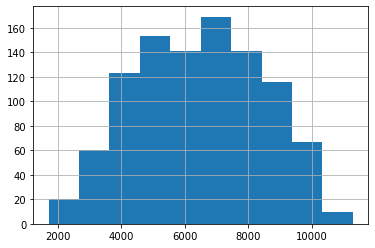

In [15]:
df.Bonus.hist()

# BasePay Boxplot of Salaries by Gender

In [18]:
fig = px.box(df, x='Gender', y="BasePay")
fig.show()

# BasePay Boxplot of Bonus by Gender

In [19]:
fig = px.box(df, x='Gender', y="Bonus")
fig.show()

# BasePay; Bonus and Total Combined Boxplots

In [21]:
Base_Pay = go.Box(x=list(df.Gender), y=list(df.BasePay), name='Base Pay')
Bonus_Pay = go.Box(x=list(df.Gender), y=list(df.Bonus), name='Bonus')
Total = go.Box(x=list(df.Gender), y=list(df.Bonus+df.BasePay), name='Total = Base + Bonus')

fig = make_subplots(rows=1, cols=3)

# Subplot the data #
# Base Pay
fig.append_trace(Base_Pay, row = 1, col = 1)
# Bonus Pay
fig.append_trace(Bonus_Pay, row = 1, col = 2)

# Total
fig.append_trace(Total, row = 1, col = 3)

fig.show()

# Heatmap of the Data

<AxesSubplot:>

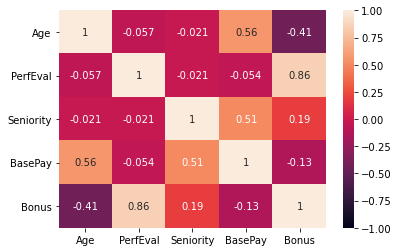

In [22]:
sns.heatmap(df.corr(), vmin=-1.0, annot=True)